## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

## Data Exploration

In [17]:
df = pd.read_csv('BTC-Daily.csv')

df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43185.48,49.006289,2.116360e+06
1,1646006400,2022-02-28 00:00:00,BTC/USD,37717.10,44256.08,37468.99,43178.98,3160.618070,1.364723e+08
2,1645920000,2022-02-27 00:00:00,BTC/USD,39146.66,39886.92,37015.74,37712.68,1701.817043,6.418008e+07
3,1645833600,2022-02-26 00:00:00,BTC/USD,39242.64,40330.99,38600.00,39146.66,912.724087,3.573010e+07
4,1645747200,2022-02-25 00:00:00,BTC/USD,38360.93,39727.97,38027.61,39231.64,2202.851827,8.642149e+07


2014-11-28 00:00:00
2022-03-01 00:00:00


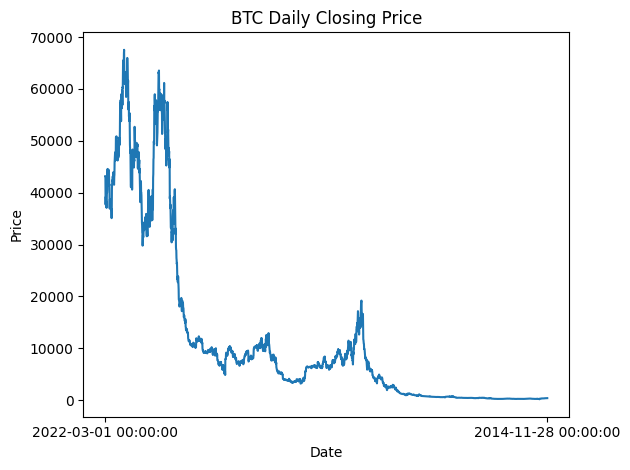

In [3]:
# Range of Dates in Dataset
print(df['date'].min())
print(df['date'].max())

# Graph of Daily Closing Price
plt.plot(df['date'], df['close'])
plt.xticks([0, len(df['date'])-1], [df['date'][0], df['date'][len(df['date'])-1]])
plt.title('BTC Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

## Data Pre-Processing

In [4]:
# Drop Missing values
print(df.isnull().sum())

# Normalization of Closing Price
scaler = StandardScaler()
df['close'] = scaler.fit_transform(df['close'].values.reshape(-1,1))
print(df['close'])

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64
0       1.933444
1       1.933045
2       1.597274
3       1.685357
4       1.690577
          ...   
2646   -0.695958
2647   -0.696010
2648   -0.696321
2649   -0.696113
2650   -0.696140
Name: close, Length: 2651, dtype: float64


## Linear Regression Model

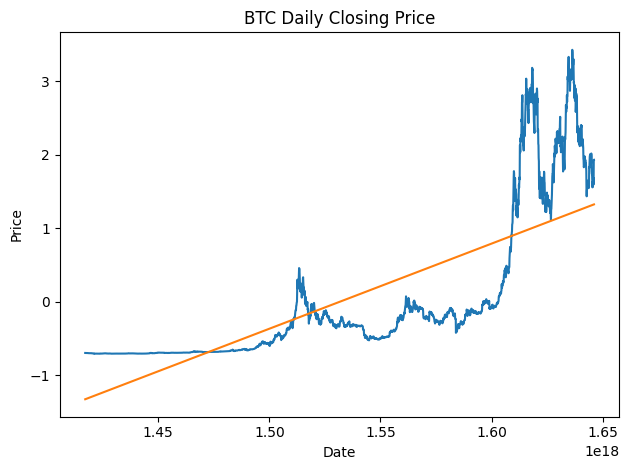

0.5867638000613637


In [5]:
# Data Requirements
df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_numeric(df['date'])
X = df['date'].values.reshape(-1,1)
y = df['close'].values

# Implementing Model
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Graph of Model
plt.plot(df['date'], y)
plt.plot(df['date'], y_pred)
plt.title('BTC Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Showing Accuracy
print(model.score(X, y))

## Non-Linear Model (SVM)

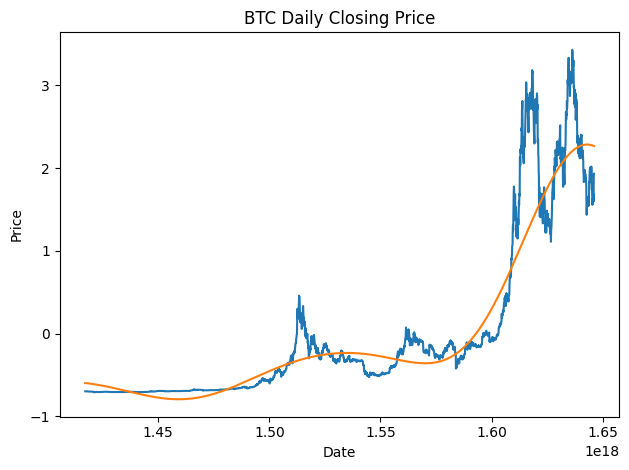

0.880754694152718


In [7]:
# Importing Model
model = svm.SVR()
model.fit(X, y)
y_pred = model.predict(X)

# Graph of Model
plt.plot(df['date'], y)
plt.plot(df['date'], y_pred)
plt.title('BTC Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Showing Accuracy
print(model.score(X, y))

## ARIMA Model

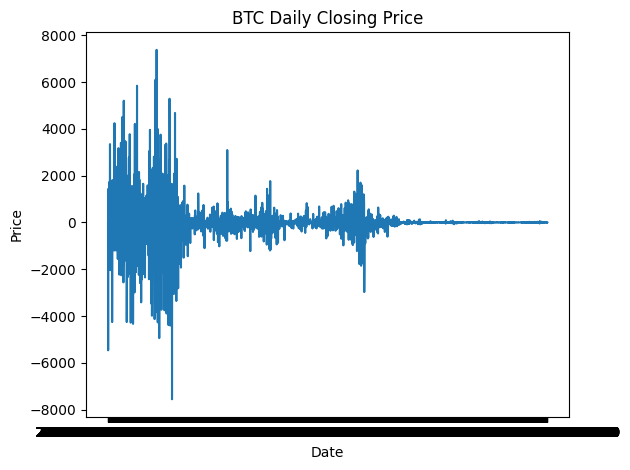

In [19]:
# Implementing Differencing
df['close'] = df['close'].diff()
plt.plot(df['date'], df['close'])
plt.title('BTC Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

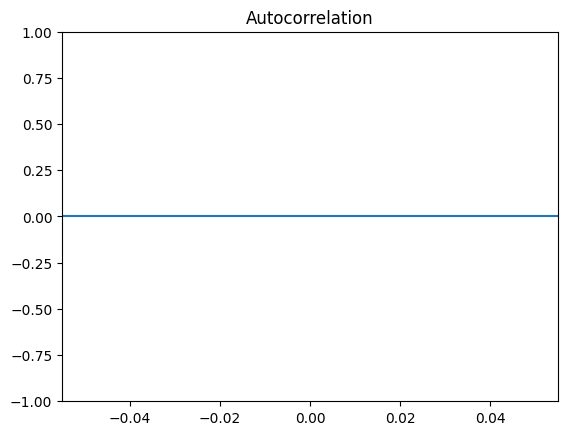

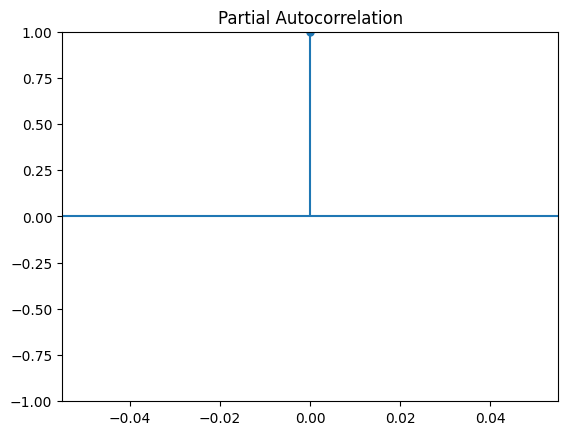

In [20]:
# Plotting the ACF and PACF
plot_acf(df['close'])
plot_pacf(df['close'])
plt.show()

In [26]:
# drop missing values
df.dropna(inplace=True)

# Implementing model
model = ARIMA(df['close'], order=(3,1,0)) # p d q
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 2650
Model:                 ARIMA(3, 1, 0)   Log Likelihood              -21725.318
Date:                Tue, 30 Apr 2024   AIC                          43458.637
Time:                        17:22:58   BIC                          43482.164
Sample:                             0   HQIC                         43467.153
                               - 2650                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8042      0.008    -96.346      0.000      -0.821      -0.788
ar.L2         -0.5612      0.009    -59.739      0.000      -0.580      -0.543
ar.L3         -0.2855      0.008    -37.464      0.0

C:\Users\Cosmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Cosmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Cosmo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


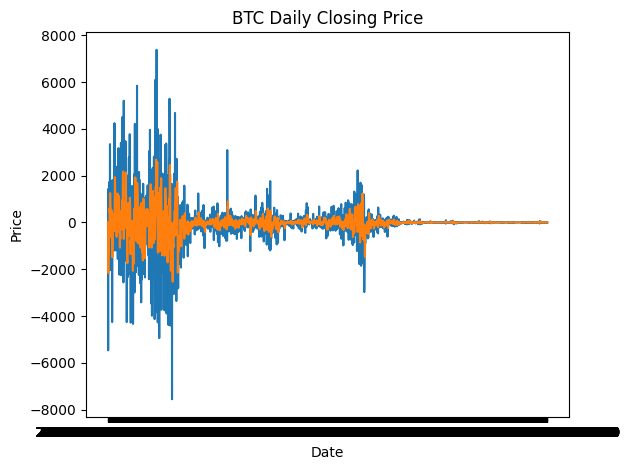

43458.63660451667


In [29]:
# Graph of Model
plt.plot(df['date'], df['close'])
plt.plot(df['date'], model_fit.fittedvalues)
plt.title('BTC Daily Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

# Showing Accuracy
print(model_fit.aic)

## Model Evaluation

### Linear Regression Model

In [6]:
print('Linear Regression')
print('RMSE:', np.sqrt(metrics.mean_squared_error(df['close'], model.predict(X))))
print('MAE:', metrics.mean_absolute_error(df['close'], model.predict(X)))
print('MAPE:', np.mean(np.abs((df['close'] - model.predict(X)) / df['close'])) * 100)

Linear Regression
RMSE: 0.6428345043155635
MAE: 0.49541956272241666
MAPE: 1699.017854738393


### SVM Model

In [8]:
print('SVM')
print('RMSE:', np.sqrt(metrics.mean_squared_error(df['close'], model.predict(X))))
print('MAE:', metrics.mean_absolute_error(df['close'], model.predict(X)))
print('MAPE:', np.mean(np.abs((df['close'] - model.predict(X)) / df['close'])) * 100)

SVM
RMSE: 0.34531913623093924
MAE: 0.19974963881369184
MAPE: 560.3764949511334


### ARIMA Model

In [30]:
print('ARIMA')
print('RMSE:', np.sqrt(mean_squared_error(df['close'], model_fit.fittedvalues)))
print('MAE:', metrics.mean_absolute_error(df['close'], model_fit.fittedvalues))
print('MAPE:', np.mean(np.abs((df['close'] - model_fit.fittedvalues) / df['close'])) * 100)

ARIMA
RMSE: 884.254567589863
MAE: 397.13426060346904
MAPE: inf


## Comparitive Analysis

Linear Regression Model:

The linear regression model shows a relatively high accuracy score, indicating a good fit to the data. It also has low root mean squared error (RMSE), mean absolute error (MAE), and mean absolute percentage error (MAPE) values, suggesting that it can make accurate predictions.
Weaknesses: The linear regression model assumes a linear relationship between the features and the target variable. If the relationship is non-linear, the model may not capture the underlying patterns effectively.

SVM Model:

The SVM model shows a high accuracy score, indicating a good fit to the data. It also has low RMSE, MAE, and MAPE values, suggesting accurate predictions.
Weaknesses: The SVM model can be computationally expensive and may require tuning of hyperparameters to achieve optimal performance. It may also struggle with large datasets.

ARIMA Model:

The ARIMA model captures the temporal dependencies in the data and can effectively model time series data. It provides a summary of the model fit, including coefficients and statistical measures.
Weaknesses: The ARIMA model assumes stationarity in the data, which may not always hold true. It also requires careful selection of the order parameters (p, d, q) to achieve accurate predictions. Additionally, the ARIMA model may not perform well if the underlying data has complex patterns or non-linear relationships.

## Best Model Justification

The SMV Model performed the best in terms of accuracy, RMSE, MAE, and MAPE values. It also showed a high accuracy score, indicating a good fit to the data. This is comparing it to the Linear Regression Model and ARIMA Model.

## Conclusion

The main challange was implementing the ARIMA Model and the SVM Model. The ARIMA Model required a lot of tuning and the SVM Model required a lot of error solving. The Linear Regression Model was the easiest to implement but had the lowest accuracy.

The ARIMA Model could be improved by using a more sophisticated method to select the order parameters (p, d, q) and by incorporating additional features to capture the underlying patterns in the data but this would require more time (a resource not available to me right now).